<a href="https://colab.research.google.com/github/jaswanthmathan/project/blob/main/JASWANTH_DAY42_DIY_SOLUTION_DOC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Problem Statement: K Nearest Neighbor (KNN) Algorithm
You are given a dataset – “diabetes.csv.” Load the dataset into a
DataFrame. Now, Considering the “Outcome” column as the target
variable, perform the following tasks:
1. Declare feature vectors and the target variable
2. Split the data into test and train fragments using train_test_split()
function in 80:20 ratio (80% train, 20% test)
3. Generate a line plot to show accuracies for different numbers of neighbors
4. Identify the maximum accuracy from the plot and Calculate model accuracy
with the nearest neighbors, which could fetch maximum accuracy
5. For the neighbors which show maximum accuracy, plot a ROC (Reciever
Operating Characteristic) curve


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Target variables:


array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

Feature variable:


array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

After splitting the data-
size of input train data is: 39424
sizeof input test data is: 9984
size of output train data is: 5024
size of output test data is: 1344


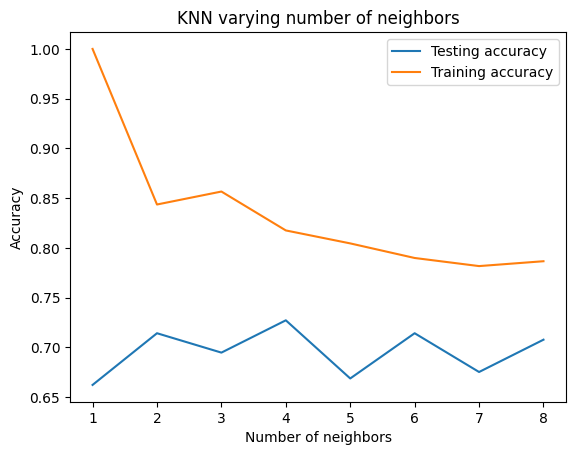

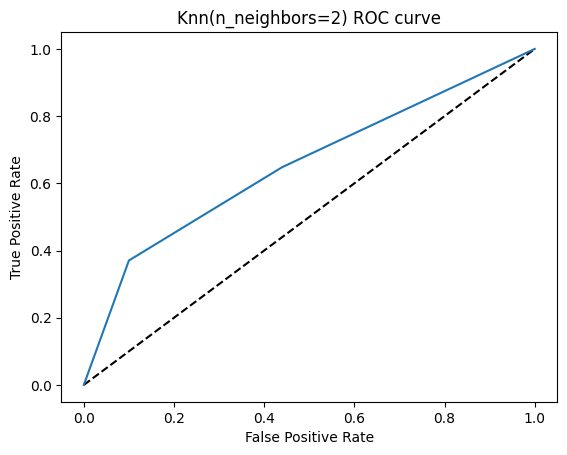

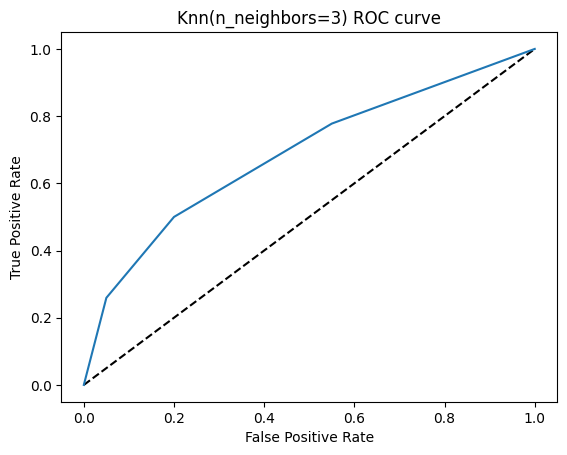

In [ ]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

"""**Loading the datatset into a DataFrame**"""

df=pd.read_csv("diabetes.csv")
df.head()

df.describe()

df.info()

df.isnull().sum()

"""**Declaring 'outcome' column as target variable and rest of the columns as feature variable**"""

x=df.drop('Outcome',axis=1).values
y=df['Outcome'].values

print('Target variables:')
display(x)

print('Feature variable:')
display(y)

"""**Splitting the data into train and test parts in the ratio 80:20 respectively**"""

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

import sys
print("After splitting the data-")
print("size of input train data is:", sys.getsizeof(x_train))
print("sizeof input test data is:", sys.getsizeof(x_test))
print("size of output train data is:", sys.getsizeof(y_train))
print("size of output test data is:", sys.getsizeof(y_test))

"""**Build a KNN (K Nearest Neighbour)classifier model using train and test data**"""

#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(x_train, y_train)
    y_train_pred = knn.predict(x_train)
    y_test_pred = knn.predict(x_test)
    train_accuracy[i]=knn.score(x_train,y_train)
    test_accuracy[i]=knn.score(x_test,y_test)

"""**Plotting accuracies for different K-values**"""

plt.title('KNN varying number of neighbors')
plt.plot(neighbors,test_accuracy,label='Testing accuracy')
plt.plot(neighbors,train_accuracy,label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

"""**Calculating model accuracy with 2 nearest neighbors**"""

train_accuracy[:3]

test_accuracy[:3]

"""**Plotting the ROC curve**"""

knn2=KNeighborsClassifier(n_neighbors=2)
knn2.fit(x_train,y_train)
y_pred_proba = knn2.predict_proba(x_test)[:,1]
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Knn(n_neighbors=2) ROC curve')
plt.show()

knn3=KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train,y_train)
y_pred_proba = knn3.predict_proba(x_test)[:,1]
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Knn(n_neighbors=3) ROC curve')
plt.show()